In [0]:
from google.colab import files
from io import BytesIO
from PIL import Image

In [0]:
uploaded = files.upload()
image = Image.open(BytesIO(uploaded['maze00.jpg'])).convert(mode = 'L')  
# Loading image in Google Colab
# .convert(mode = 'L') is to convert RGB images to gray scale

Saving maze00.jpg to maze00 (2).jpg


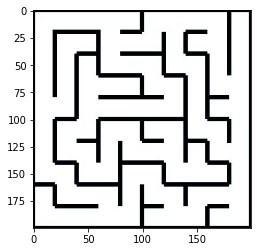

In [0]:
import matplotlib.pyplot as plt

plt.imshow(image,cmap = 'bone')
plt.show()

# Plotting the maze image

In [0]:
print(image.size)

ER = int(input()) # Input End Row index
EC = int(input()) # Input End Column index

start = (0,0)
end = (ER,EC)

CELL_SIZE = image.size[0] // (EC + 1) 
# OR CELL_SIZE = image.size[1] // (ER + 1) 
print(CELL_SIZE)

(200, 200)
9
9
20


In [0]:
print(type(image))

<class 'PIL.Image.Image'>


In [0]:
import numpy as np

pixels = np.asarray(image)
print(type(pixels))
pixels

# Getting the Pixel data of the image

<class 'numpy.ndarray'>


array([[  5,   0,   2, ...,   2,   0,   5],
       [  0,  14,   0, ...,   0,  14,   0],
       [  0,   0, 255, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255,   0,   0],
       [  0,  14,   0, ...,   0,  14,   0],
       [  5,   0,   2, ...,   2,   0,   5]], dtype=uint8)

In [0]:
pixels.shape 

(200, 200)

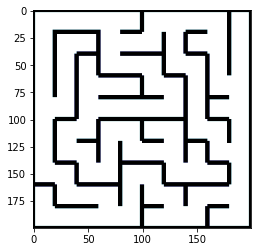

In [0]:
pixelsbw = pixels.copy()
# Pixelsbw are the Black and White pixels only
# 0 Pixel value means black , 255 means white and 127 means grey
# Converting all the pixel values to 0 and 255 only i.e B/W only

pixelsbw[pixelsbw < 127] = 0
pixelsbw[pixelsbw >= 127] = 255

# Plotting the B/W image
plt.imshow(pixelsbw,cmap = 'bone')
plt.show()

In [0]:
# Creating a copy of pixelsbw (Binary Image)
# Where white pixel is 1 and black pixel is 0

binary_image = pixelsbw.copy()
binary_image[binary_image == 0] = 0
binary_image[binary_image == 255] = 1
binary_image.shape

(200, 200)

In [0]:
# Plotting a certain portion(100 X 100) of the binary image

for i in range(100):
    for j in range(100):
        print(binary_image[i,j],end = '')
    print() 

 # Here 0 represents blocked areas(black lines in maze) and 1 represents the white space      

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100
0011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [0]:
# Status will give us the entire information about each and every cell in the maze
# Using this we will be able to know that whether we can move up or not,down or not,left or not,right or not from a particular cell


def Status(x,y,binary_image):       # x,y is the coordinate of cell
    x_ = CELL_SIZE*x
    y_ = CELL_SIZE*y                       # x_,y_ is the coordinate of pixels in binary image  
    cell = binary_image[x_ : x_ + CELL_SIZE , y_ : y_ + CELL_SIZE]
    
    # cell represents the CELL_SIZE * CELL_SIZE pixels in the binary image
    
    allzero = np.zeros(CELL_SIZE,int)
    top,bottom,left,right = True,True,True,True
    
    if(cell[0,:] == allzero).sum() == CELL_SIZE :       # If the topmost row of cell is 000000000 CELL_SIZE times that means we can't go up
        top = False    
    if(cell[CELL_SIZE - 1,:] == allzero).sum() == CELL_SIZE :      # If the bottommost row of cell is 000000000 CELL_SIZE times that means we can't go down
        bottom = False
    if(cell[:,0] == allzero).sum() == CELL_SIZE:        # If the leftmost column of cell is 000000000 CELL_SIZE times that means we can't go left
        left = False    
    if(cell[:,CELL_SIZE - 1] == allzero).sum() == CELL_SIZE:       # If the rightmost column of cell is 000000000 CELL_SIZE times that means we can't go right
        right = False  
        
    return (top,bottom,left,right)    

In [0]:
i_ = np.random.randint(ER)
j_ = np.random.randint(EC)
print(i_,j_)
print (Status(i_,j_,binary_image))

# Getting the status of any random Cell in the maze

0 0
(False, True, False, True)


In [0]:
# Through allCellStatus[i][j] we can get the status of any cell in the maze

allCellStatus = [ [] for i in range(ER+1)]

for i in range(ER+1):
    for j in range(EC+1):
        allCellStatus[i].append(Status(i,j,binary_image))

In [0]:
allCellStatus[i_][j_]

(False, True, False, True)

In [0]:
def is_valid(coordinate):          # is_valid tells that whether a given coordinate is valid or not
    row,col = coordinate
    return ( (row>=0) and (row<=ER) and (col>=0) and (col<=EC) )

def neighbors(coordinate):         # neighbors gives the 4 adjacent coordinates of a given coordinate   
    x,y = coordinate
    return [(x-1,y),(x+1,y),(x,y-1),(x,y+1)]

In [0]:
# The function to find the smallest path in the maze

def GivePath(coordinate , end , visited , obstacle = start):

    if(coordinate == end):
        path = []
        path.append(coordinate)
        return path
    
    Visited = []
    for k in range(4):
      Visited.append(visited.copy())
    indeces = []  

    n_neighbors,neighbors_ = 0 , []
    i = 0
        
    for neighbor in neighbors(coordinate):
        xN,yN = neighbor
        xC,yC = coordinate
        if is_valid(neighbor) and (Visited[i][xN][yN] == 0) and (neighbor != obstacle):
            if (allCellStatus[xC][yC][i]) :
                indeces.append(i)
                n_neighbors += 1
                neighbors_.append(neighbor)
                Visited[i][xN][yN] = 1
        i += 1
 
    smallest_path = []
    smallest_length = 99999  
    
    if(n_neighbors == 0) :
        return []
    else:
        for j in range(n_neighbors):
            onwards_path = GivePath(neighbors_[j] , end , Visited[indeces[j]] , obstacle)
            if(len(onwards_path)<smallest_length and len(onwards_path) != 0):
              smallest_length = len(onwards_path)
              smallest_path = onwards_path     

        if smallest_path == []:
          return []
        
        starting = []
        starting.append(coordinate)

        return starting + smallest_path

In [0]:
# Finding the smallest path

visited = [ [0 for j in range(EC+1)] for i in range(ER+1)]
visited[start[0]][start[1]] = 1
visited = np.array(visited)

path = GivePath(start , end , visited)

for i in path:
  print(i,end = ' ')

(0, 0) (0, 1) (0, 2) (0, 3) (1, 3) (1, 4) (1, 5) (0, 5) (0, 6) (1, 6) (2, 6) (2, 7) (3, 7) (4, 7) (5, 7) (5, 8) (6, 8) (6, 9) (7, 9) (8, 9) (9, 9) 

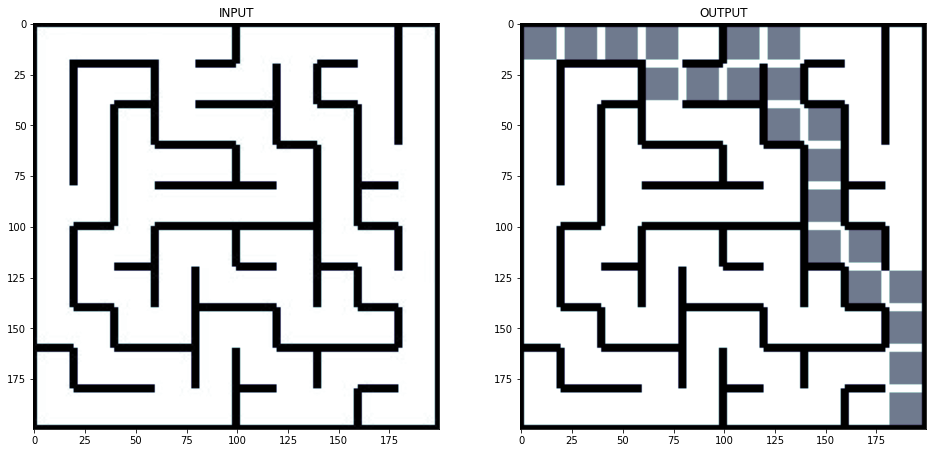

In [0]:
# Plotting the smallest path in the maze

for coordinate in path:
  x,y = coordinate
  x_,y_ = CELL_SIZE*x + 2 ,CELL_SIZE*y + 2

  for i in range(CELL_SIZE - 4):
    for j in range(CELL_SIZE - 4):
      pixelsbw[x_ + i , y_ + j] = 127

figure = plt.figure(figsize = (16,16))
ax = figure.add_subplot(1,2,1) 
ax.imshow(pixels,cmap = 'bone')
ax.title.set_text("INPUT")
ax = figure.add_subplot(1,2,2)
ax.title.set_text("OUTPUT") 
ax.imshow(pixelsbw,cmap = 'bone')
plt.show()

In [0]:
# Finding the path when the coordinate of obstacle is given

obstacle = (int(input()),int(input()))

visited = [ [0 for j in range(EC+1)] for i in range(ER+1)]
visited[start[0]][start[1]] = 1
visited = np.array(visited)

path = GivePath(start , end , visited , obstacle)

for i in path:
  print(i,end = ' ')

0
1
(0, 0) (1, 0) (2, 0) (3, 0) (4, 0) (5, 0) (6, 0) (7, 0) (7, 1) (8, 1) (8, 2) (8, 3) (9, 3) (9, 4) (8, 4) (7, 4) (7, 5) (8, 5) (8, 6) (9, 6) (9, 7) (8, 7) (8, 8) (8, 9) (9, 9) 

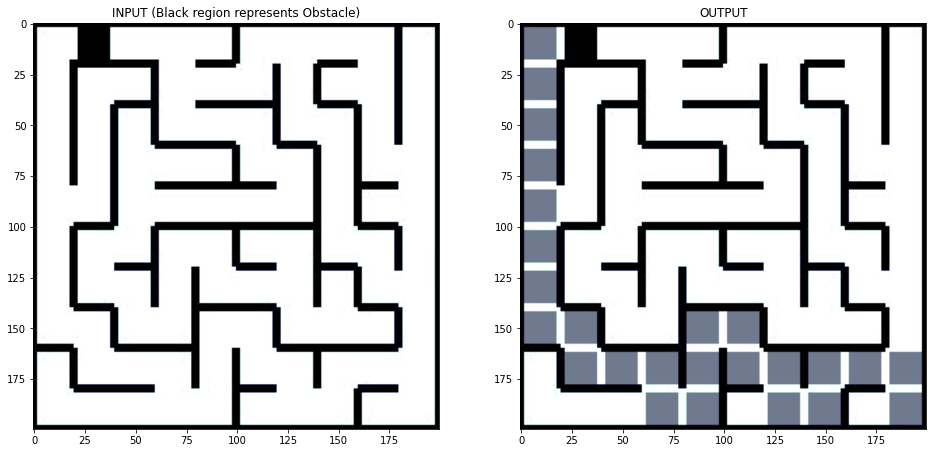

In [0]:
# Plotting the new path in the maze with obstacle

pixelsbw = pixels.copy()

x = obstacle[0] * CELL_SIZE + 2
y = obstacle[1] * CELL_SIZE + 2

for i in range(CELL_SIZE - 4):
  for j in range(CELL_SIZE - 4):
    pixelsbw[x + i , y + j] = 0

figure = plt.figure(figsize = (16,16))
ax = figure.add_subplot(1,2,1) 
ax.imshow(pixelsbw,cmap = 'bone')
ax.title.set_text("INPUT (Black region represents Obstacle)")

for coordinate in path:
  x,y = coordinate
  x_,y_ = CELL_SIZE*x + 2 ,CELL_SIZE*y + 2

  for i in range(CELL_SIZE - 4):
    for j in range(CELL_SIZE - 4):
      pixelsbw[x_ + i , y_ + j] = 127

ax = figure.add_subplot(1,2,2)
ax.title.set_text("OUTPUT") 
ax.imshow(pixelsbw,cmap = 'bone')
plt.show()